In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import MY_bcilib as mybci

In [2]:
subject = 1

## **<font color = yellow>文件读取载入预处理</font>**

### **<font color = carmine>创建EPOCH文件</font>**

In [3]:
'''
read_raw_filename = 'data/B0305E.gdf'
save_epo_filename = 'data/B0305E_epo.fif'

raw = mne.io.read_raw_gdf(read_raw_filename, preload=True)

raw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])

# 768 --- start a trial
custom_mapping = {'768':2}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
#  3s开始为时间cue
raw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=7)

evoked = raw_epochs.average()
evoked.plot(time_unit='s')

raw_epochs.save(save_epo_filename)
'''

"\nread_raw_filename = 'data/B0305E.gdf'\nsave_epo_filename = 'data/B0305E_epo.fif'\n\nraw = mne.io.read_raw_gdf(read_raw_filename, preload=True)\n\nraw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])\n\n# 768 --- start a trial\ncustom_mapping = {'768':2}\n(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)\n#  3s开始为时间cue\nraw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=7)\n\nevoked = raw_epochs.average()\nevoked.plot(time_unit='s')\n\nraw_epochs.save(save_epo_filename)\n"

### **<font color = carmine>测试集数据标签读取</font>**

In [4]:
from scipy.io import loadmat

filename1 = 'data/B0' + str(subject) +'04E.mat'
filename2 = 'data/B0' + str(subject) +'05E.mat'

raw_label_data = loadmat(filename1)
B0104E_label = raw_label_data['classlabel']

raw_label_data = loadmat(filename2)
B0105E_label = raw_label_data['classlabel']

In [5]:
test_label_1 = np.concatenate((B0104E_label,B0105E_label))

test_label_1 = np.array(test_label_1,dtype=np.float32) - 1
test_label_1 = test_label_1.reshape(-1,)

print(test_label_1.shape)

(320,)


### **<font color = carmine>读取测试数据epochs</font>**
采样率250hz   测试数据从-0.5-7s数据，cue开始时间为3s ,考虑的数据长度为 -3.5-7s

In [6]:
sample_rate = 250.0
base_time = -0.5
cue_time = 3

cue_start = int((cue_time - base_time) * sample_rate)

In [7]:
filename = 'data/B0' + str(subject) + '04E_epo.fif'
B104E_epochs = mne.read_epochs(filename)
B104E_data = B104E_epochs.get_data()
B104E_data = B104E_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0104E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [8]:
filename = 'data/B0' + str(subject) + '05E_epo.fif'
B105E_epochs = mne.read_epochs(filename)
B105E_data = B105E_epochs.get_data()
B105E_data = B105E_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0105E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [9]:
test_data = np.concatenate((B104E_data,B105E_data))
print(test_data.shape)

(320, 3, 1001)


### **<font color = carmine>读取训练集数据以及标签</font>**

读取训练集标签

In [10]:
filename1 = 'data/B0' +  str(subject) + '01T.mat'
filename2 = 'data/B0' +  str(subject) + '02T.mat'
filename3 = 'data/B0' +  str(subject) + '03T.mat'


raw_label_data = loadmat(filename1)
B0101T_label = raw_label_data['classlabel']

raw_label_data = loadmat(filename2)
B0102T_label = raw_label_data['classlabel']

raw_label_data = loadmat(filename3)
B0103T_label = raw_label_data['classlabel']

In [11]:
train_label_1 = np.concatenate((B0101T_label,B0102T_label))
train_label_1 = np.concatenate((train_label_1,B0103T_label))

train_label_1 = np.array(train_label_1,dtype=np.float32) - 1
train_label_1 = train_label_1.reshape(-1,)

print(train_label_1.shape)


(400,)


读取训练集数据

In [12]:
filename = 'data/B0' + str(subject) + '01T_epo.fif'

B101T_epochs = mne.read_epochs(filename)
B101T_data = B101T_epochs.get_data()
B101T_data = B101T_data[:,:,cue_start:]
print(B101T_data.shape)

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0101T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
(120, 3, 1001)


In [13]:
filename = 'data/B0' + str(subject) + '02T_epo.fif'

B102T_epochs = mne.read_epochs(filename)
B102T_data = B102T_epochs.get_data()
B102T_data = B102T_data[:,:,cue_start:]
print(B102T_data.shape)

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0102T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
(120, 3, 1001)


In [14]:
filename = 'data/B0' + str(subject) + '03T_epo.fif'

B103T_epochs = mne.read_epochs(filename)
B103T_data = B103T_epochs.get_data()
B103T_data = B103T_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0103T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [15]:
train_data = np.concatenate((B101T_data,B102T_data))
train_data = np.concatenate((train_data,B103T_data))
print(train_data.shape)

(400, 3, 1001)


In [16]:
'''
train_cls1_data = train_data[train_label_1==0,:,:]
train_cls2_data = train_data[train_label_1==1,:,:]
print('class 1 train data shape : ',train_cls1_data.shape)
print('class 2 train data shape : ',train_cls2_data.shape)
'''

"\ntrain_cls1_data = train_data[train_label_1==0,:,:]\ntrain_cls2_data = train_data[train_label_1==1,:,:]\nprint('class 1 train data shape : ',train_cls1_data.shape)\nprint('class 2 train data shape : ',train_cls2_data.shape)\n"

## **<font color = yellow>信号预处理</font>**

### **<font color = carmine>band-pass带通滤波</font>**

划分为7个频带   频带间隔4hz，起始频率为4hz ， 4-32hz 共7个频带

In [17]:
fre_band_num = 5
freband_train_data_1 = np.zeros((fre_band_num,train_data.shape[0],train_data.shape[1],train_data.shape[2]))
freband_test_data_1 = np.zeros((fre_band_num,test_data.shape[0],test_data.shape[1],test_data.shape[2]))

start_fre = 8
fre_stride = 8
for i in range(fre_band_num):
    s = start_fre + i * fre_stride
    e = s + fre_stride
    freband_train_data_1[i,:,:,:] = mybci.band_pass(trials = train_data,lo = s,hi = e,sample_rate = 250)
    freband_test_data_1[i,:,:,:] = mybci.band_pass(trials = test_data,lo = s,hi = e,sample_rate = 250)



trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)


In [80]:
freband_train_data_1.shape

(5, 400, 3, 1001)

## **<font color = yellow>数据增强</font>**

窗口大小设置为2s,步长为0.1s，总数据长度为4s，故一个trial数据可以切分成21个窗口数据

In [18]:
winow_size = int( 2 * sample_rate )
stride_size = int( 0.1 * sample_rate )
window_num = 21

# fre_band * SW trials * channels * samples
freband_train_data = np.zeros((fre_band_num,train_data.shape[0] * window_num ,train_data.shape[1],winow_size))
freband_test_data = np.zeros((fre_band_num,test_data.shape[0] * window_num ,test_data.shape[1],winow_size))

训练集标签和数据增强

In [19]:
for i in range(window_num):   #窗口编号
    for j in range(train_data.shape[0]):  #数据编号
        idx = i*train_data.shape[0] + j
        sw_start = stride_size * i
        sw_end = sw_start + winow_size
        freband_train_data[:,idx,:,:] = freband_train_data_1[:,j,:,sw_start:sw_end]
    print('slide window data idx:  ',sw_start,'---',sw_end)
        

slide window data idx:   0 --- 500
slide window data idx:   25 --- 525
slide window data idx:   50 --- 550
slide window data idx:   75 --- 575
slide window data idx:   100 --- 600
slide window data idx:   125 --- 625
slide window data idx:   150 --- 650
slide window data idx:   175 --- 675
slide window data idx:   200 --- 700
slide window data idx:   225 --- 725
slide window data idx:   250 --- 750
slide window data idx:   275 --- 775
slide window data idx:   300 --- 800
slide window data idx:   325 --- 825
slide window data idx:   350 --- 850
slide window data idx:   375 --- 875
slide window data idx:   400 --- 900
slide window data idx:   425 --- 925
slide window data idx:   450 --- 950
slide window data idx:   475 --- 975
slide window data idx:   500 --- 1000


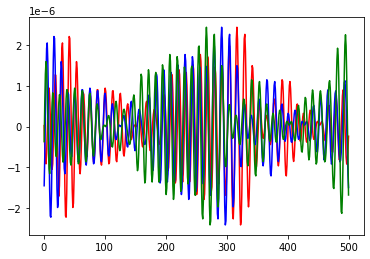

In [20]:
x = np.linspace(1,500,500)

plt.plot(x,freband_train_data[1,0,0,:],'r')
plt.plot(x,freband_train_data[1,train_data.shape[0],0,:],'b')
plt.plot(x,freband_train_data[1,train_data.shape[0]*2,0,:],'g')
plt.show()

In [21]:
train_label = train_label_1
for i in range(window_num-1):
    train_label = np.concatenate((train_label,train_label_1))
print(train_label.shape)

(8400,)


测试集标签和数据增强

In [22]:
for i in range(window_num):   #窗口编号
    for j in range(test_data.shape[0]):  #数据编号
        idx = i*test_data.shape[0] + j
        sw_start = stride_size * i
        sw_end = sw_start + winow_size
        freband_test_data[:,idx,:,:] = freband_test_data_1[:,j,:,sw_start:sw_end]
    print('slide window data idx:  ',sw_start,'---',sw_end)
print('test sw data shape : ',freband_test_data.shape)

slide window data idx:   0 --- 500
slide window data idx:   25 --- 525
slide window data idx:   50 --- 550
slide window data idx:   75 --- 575
slide window data idx:   100 --- 600
slide window data idx:   125 --- 625
slide window data idx:   150 --- 650
slide window data idx:   175 --- 675
slide window data idx:   200 --- 700
slide window data idx:   225 --- 725
slide window data idx:   250 --- 750
slide window data idx:   275 --- 775
slide window data idx:   300 --- 800
slide window data idx:   325 --- 825
slide window data idx:   350 --- 850
slide window data idx:   375 --- 875
slide window data idx:   400 --- 900
slide window data idx:   425 --- 925
slide window data idx:   450 --- 950
slide window data idx:   475 --- 975
slide window data idx:   500 --- 1000
test sw data shape :  (5, 6720, 3, 500)


In [23]:
test_label = test_label_1
for i in range(window_num-1):
    test_label = np.concatenate((test_label,test_label_1))
print(test_label.shape)

(6720,)


## **<font color = yellow>特征提取</font>**

In [24]:
CSP_W = np.zeros((fre_band_num,3,3))

freband_train_data_cls1 = freband_train_data[:,train_label==0,:,:]
freband_train_data_cls2 = freband_train_data[:,train_label==1,:,:]

for i in range(fre_band_num):
    CSP_W[i,:,:] = mybci.cal_W(freband_train_data_cls1[i,:,:,:],freband_train_data_cls2[i,:,:,:])



两类的特征值lambda:
 [0.57882132 0.49704976 0.38177333]
Sb value is  [[0.52775393 0.05360429 0.0314782 ]
 [0.05360429 0.58326841 0.0050706 ]
 [0.0314782  0.0050706  0.43133324]]
reverse Sb value is  [[0.52775393 0.05360429 0.0314782 ]
 [0.05360429 0.58326841 0.0050706 ]
 [0.0314782  0.0050706  0.43133324]]
------------------------
两类的特征值lambda:
 [0.53630365 0.51776662 0.42246972]
Sb value is  [[ 0.54047299  0.04704292 -0.00671986]
 [ 0.04704292  0.5173793   0.00161786]
 [-0.00671986  0.00161786  0.46560773]]
reverse Sb value is  [[ 0.54047299  0.04704292 -0.00671986]
 [ 0.04704292  0.5173793   0.00161786]
 [-0.00671986  0.00161786  0.46560773]]
------------------------
两类的特征值lambda:
 [0.52938694 0.49875453 0.4927246 ]
Sb value is  [[ 0.48415224 -0.0061041   0.01484395]
 [-0.0061041   0.50011641  0.00791639]
 [ 0.01484395  0.00791639  0.49486528]]
reverse Sb value is  [[ 0.48415224 -0.0061041   0.01484395]
 [-0.0061041   0.50011641  0.00791639]
 [ 0.01484395  0.00791639  0.49486528]]
--------

提取训练集PSD特征

In [25]:
freband_train_psd =  np.zeros((fre_band_num,freband_train_data.shape[1],freband_train_data.shape[2],251))
print(freband_train_psd.shape)

for i in range(fre_band_num):
    freband_train_psd[i,:,:],freqs = mybci.psd(mybci.apply_mix(CSP_W[i,:,:],freband_train_data[i,:,:,:]),NFFT=500,Fs=sample_rate)

print('freband_train_psd shape : ',freband_train_psd.shape)

(5, 8400, 3, 251)
freband_train_psd shape :  (5, 8400, 3, 251)


In [26]:
#取通道的能量和作为特征
freband_train_psd_feat = np.zeros((fre_band_num,freband_train_data.shape[1],freband_train_data.shape[2]))

for i in range(fre_band_num):   # 频带数
    for j in range(freband_train_data.shape[1]):   #trial数
        for k in range(freband_train_data.shape[2]):   #通道数
            freband_train_psd_feat[i,j,k] = np.mean(freband_train_psd[i,j,k,:])

print('freband_train_psd_feat shape : ',freband_train_psd_feat.shape)

freband_train_psd_feat shape :  (5, 8400, 3)


In [27]:
freband_train_psd_feat_conb = np.zeros((freband_train_psd_feat.shape[1],3))

print('freband_train_psd_feat_conb shape : ',freband_train_psd_feat_conb.shape)

freband_train_psd_feat_conb = freband_train_psd_feat[0,:,:]
for i in range(fre_band_num-1):
    freband_train_psd_feat_conb = np.concatenate((freband_train_psd_feat_conb,freband_train_psd_feat[i+1,:,:]),axis=1)

print('freband_train_psd_feat_conb shape :',freband_train_psd_feat_conb.shape)

freband_train_psd_feat_conb shape :  (8400, 3)
freband_train_psd_feat_conb shape : (8400, 15)


分析PSD特征

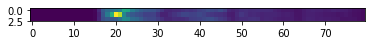

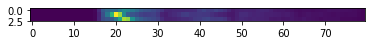

In [78]:
fre1_psd_mean = np.mean(freband_train_psd[0,train_label==0,:,0:80],axis=0)
plt.imshow(fre1_psd_mean)
plt.show()
fre1_psd_mean = np.mean(freband_train_psd[0,train_label==1,:,0:80],axis=0)
plt.imshow(fre1_psd_mean)
plt.show()

allband_train_psd shape is : (8400, 15, 251)
allband_psd_mean shape : (15, 100)


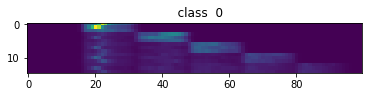

allband_psd_mean shape : (15, 100)


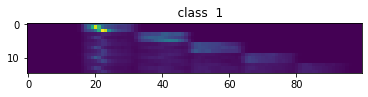

In [29]:
allband_channels = fre_band_num * 3

allband_train_psd = freband_train_psd.reshape(freband_train_psd.shape[1],allband_channels,251)


for i in range(fre_band_num-1):
    s = i*3
    e = s + 3
    allband_train_psd[:,s:e,:] = freband_train_psd[i,:,:,:]
print('allband_train_psd shape is :',allband_train_psd.shape)


allband_psd_mean = np.mean(allband_train_psd[train_label==0,:,0:100],axis=0)
print('allband_psd_mean shape :',allband_psd_mean.shape)
plt.imshow(allband_psd_mean)
plt.title('   class  0')
plt.show()
num = 4
allband_psd_mean = np.mean(allband_train_psd[train_label==1,:,0:100],axis=0)
print('allband_psd_mean shape :',allband_psd_mean.shape)
plt.imshow(allband_psd_mean)
plt.title('   class  1')
plt.show()

提取训练集PSD特征

In [30]:
freband_test_psd =  np.zeros((fre_band_num,freband_test_data.shape[1],freband_test_data.shape[2],251))
print(freband_test_psd.shape)

for i in range(fre_band_num):
    freband_test_psd[i,:,:],freqs = mybci.psd(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:]),NFFT=500,Fs=sample_rate)

print('freband_test_psd shape : ',freband_test_psd.shape)

(5, 6720, 3, 251)
freband_test_psd shape :  (5, 6720, 3, 251)


In [31]:
#取通道的能量和作为特征
freband_test_psd_feat = np.zeros((fre_band_num,freband_test_data.shape[1],freband_test_data.shape[2]))

for i in range(fre_band_num):   # 频带数
    for j in range(freband_test_data.shape[1]):   #trial数
        for k in range(freband_test_data.shape[2]):   #通道数
            freband_test_psd_feat[i,j,k] = np.mean(freband_test_psd[i,j,k,:])

print('freband_test_psd_feat shape : ',freband_test_psd_feat.shape)

freband_test_psd_feat shape :  (5, 6720, 3)


In [32]:
freband_test_psd_feat_conb = np.zeros((freband_test_psd_feat.shape[1],3))

print('freband_test_psd_feat_conb shape : ',freband_test_psd_feat_conb.shape)

freband_test_psd_feat_conb = freband_test_psd_feat[0,:,:]
for i in range(fre_band_num-1):
    freband_test_psd_feat_conb = np.concatenate((freband_test_psd_feat_conb,freband_test_psd_feat[i+1,:,:]),axis=1)

print('freband_test_psd_feat_conb shape :',freband_test_psd_feat_conb.shape)

freband_test_psd_feat_conb shape :  (6720, 3)
freband_test_psd_feat_conb shape : (6720, 15)


In [82]:
freband_train_data_1.shape

(5, 400, 3, 1001)

两类的特征值lambda:
 [0.56909678 0.49772906 0.40048693]
Sb value is  [[ 0.52255579  0.04898234  0.02424964]
 [ 0.04898234  0.5681281  -0.00984703]
 [ 0.02424964 -0.00984703  0.44200333]]
reverse Sb value is  [[ 0.52255579  0.04898234  0.02424964]
 [ 0.04898234  0.5681281  -0.00984703]
 [ 0.02424964 -0.00984703  0.44200333]]
------------------------
fre1_csp_data shape  (400, 3, 1001)
fc        0.8125
cparam    812.5
[500 499 498 497 496 495 494 493 492 491 490 489 488 487 486 485 484 483
 482 481 480 479 478 477 476 475 474 473 472 471 470 469 468 467 466 465
 464 463 462 461 460 459 458 457 456 455 454 453 452 451 450 449 448 447
 446 445 444 443 442 441 440 439 438 437 436 435 434 433 432 431 430 429
 428 427 426 425 424 423 422 421 420 419 418 417 416 415 414 413 412 411
 410 409 408 407 406 405 404 403 402 401 400 399 398 397 396 395 394 393
 392 391 390 389 388 387 386 385 384 383 382 381 380 379 378 377 376 375
 374 373 372 371 370 369 368 367 366 365 364 363 362 361 360 359 358 357
 3

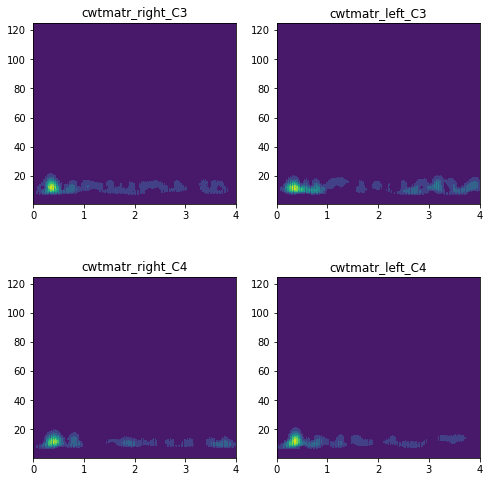

(499,)


In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.font_manager import FontProperties


fre_s_n = 0
csp_xx = mybci.cal_W(freband_train_data_1[fre_s_n,train_label_1==0,:,:],freband_train_data_1[fre_s_n,train_label_1==1,:,:])



#fre1_csp_data = mybci.apply_mix(CSP_W[0,:,:],freband_train_data[0,:,:,:])
fre1_csp_data = mybci.apply_mix(csp_xx,freband_train_data_1[fre_s_n,:,:,:])

print('fre1_csp_data shape ',fre1_csp_data.shape)

t = np.arange(1001)/250

wavename = 'morl'
totalscal = 500  # 窗口长度
fc = pywt.central_frequency(wavename)
print('fc       ',fc)
cparam = 2 * fc * totalscal
print('cparam   ',cparam)

scales = cparam / np.arange(totalscal, 1, -1)
print(np.arange(totalscal, 1, -1))
print('scales   ',scales)

left_c3_fre1_csp_data = fre1_csp_data[train_label_1==0,0,:]
left_c4_fre1_csp_data = fre1_csp_data[train_label_1==0,1,:]
right_c3_fre1_csp_data = fre1_csp_data[train_label_1==1,0,:]
right_c4_fre1_csp_data = fre1_csp_data[train_label_1==1,1,:]

print('right_c4_fre1_csp_data shape : ',right_c4_fre1_csp_data.shape)


[cwtmatr_right_C3, frequencies] = pywt.cwt(np.mean(left_c3_fre1_csp_data,axis=0), scales, wavename, 1.0 / sample_rate)
[cwtmatr_right_C4, frequencies] = pywt.cwt(np.mean(left_c4_fre1_csp_data,axis=0), scales, wavename, 1.0 / sample_rate)
[cwtmatr_left_C3, frequencies] = pywt.cwt(np.mean(right_c3_fre1_csp_data,axis=0), scales, wavename, 1.0 / sample_rate)
[cwtmatr_left_C4, frequencies] = pywt.cwt(np.mean(right_c4_fre1_csp_data,axis=0), scales, wavename, 1.0 / sample_rate)
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.contourf(t, frequencies, abs(cwtmatr_right_C3))
plt.title('cwtmatr_right_C3')
'''
plt.subplot(323)
plt.contourf(t, frequencies, abs(cwtmatr_right_Cz))
plt.title('cwtmatr_right_Cz')
'''
plt.subplot(223)
plt.contourf(t, frequencies, abs(cwtmatr_right_C4))
plt.title('cwtmatr_right_C4')

plt.subplot(222)
plt.contourf(t, frequencies, abs(cwtmatr_left_C3))
plt.title('cwtmatr_left_C3')
'''
plt.subplot(324)
plt.contourf(t, frequencies, abs(cwtmatr_left_Cz))
plt.title('cwtmatr_left_Cz')
'''
plt.subplot(224)
plt.contourf(t, frequencies, abs(cwtmatr_left_C4))
plt.title('cwtmatr_left_C4')
plt.subplots_adjust(hspace=0.4)
plt.show()
print(frequencies.shape)

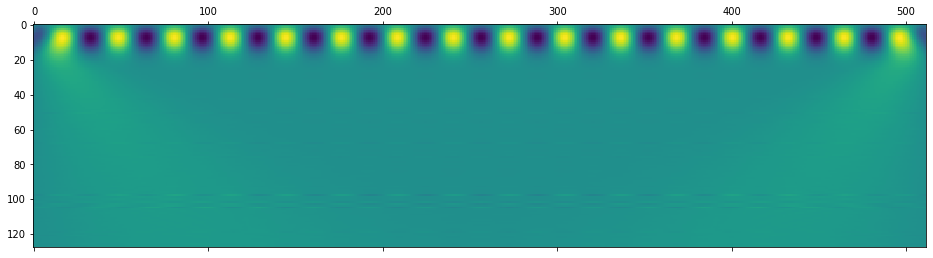

In [64]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(512)
y = np.sin(2*np.pi*x/32)

coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')

plt.matshow(coef) # doctest: +SKIP

plt.show() # doctest: +SKIP

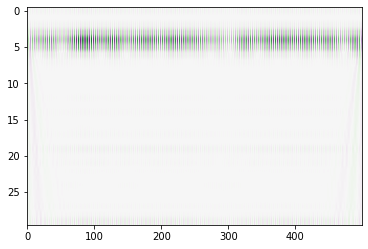

In [73]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-0.5, 1.5, 500, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) 
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(np.mean(left_c3_fre1_csp_data,axis=0), widths, 'morl')
plt.imshow(cwtmatr,cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  # doctest: +SKIP
plt.show() # doctest: +SKIP

训练集CSP特征提取

In [33]:
freband_train_csp_var =  np.zeros((fre_band_num,freband_train_data.shape[1],freband_train_data.shape[2]))
freband_train_raw_var =  np.zeros((fre_band_num,freband_train_data.shape[1],freband_train_data.shape[2]))

for i in range(fre_band_num):
    freband_train_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_train_data[i,:,:,:])))
    freband_train_raw_var[i,:,:] = abs(mybci.logvar(freband_train_data[i,:,:,:]))

print('freband_train_csp_var shape :',freband_train_csp_var.shape)


freband_train_csp_feat = np.zeros((fre_band_num,freband_train_data.shape[1],2))

for i in range(fre_band_num):

    _,b  =mybci.cal_csp_feature(freband_train_csp_var[i,:,:],fea_num=[0,-1])
    _ , freband_train_csp_feat[i,:,:]= mybci.cal_csp_feature(freband_train_csp_var[i,:,:],fea_num=[0,-1])

print('freband_train_csp_feat shape :',freband_train_csp_feat.shape)

freband_train_csp_var shape : (5, 8400, 3)
freband_train_csp_feat shape : (5, 8400, 2)


In [34]:
freband_train_csp_feat_conb = np.zeros((freband_train_data.shape[0],2))

freband_train_csp_feat_conb = freband_train_csp_feat[0,:,:]
for i in range(fre_band_num-1):
    freband_train_csp_feat_conb = np.concatenate((freband_train_csp_feat_conb,freband_train_csp_feat[i+1,:,:]),axis=1)

print('freband_train_csp_feat_conb shape :',freband_train_csp_feat_conb.shape)

freband_train_csp_feat_conb shape : (8400, 10)


测试集CSP特征提取

In [35]:
freband_test_csp_var =  np.zeros((fre_band_num,freband_test_data.shape[1],freband_test_data.shape[2]))

for i in range(fre_band_num):
    freband_test_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:])))

print('freband_train_csp_var shape :',freband_test_csp_var.shape)

freband_test_csp_feat = np.zeros((fre_band_num,freband_test_data.shape[1],2))

for i in range(fre_band_num):
    _ , freband_test_csp_feat[i,:,:]= mybci.cal_csp_feature(freband_test_csp_var[i,:,:],fea_num=[0,-1])

print('freband_test_csp_feat shape :',freband_test_csp_feat.shape)

freband_train_csp_var shape : (5, 6720, 3)
freband_test_csp_feat shape : (5, 6720, 2)


In [36]:
freband_test_csp_feat_conb = np.zeros((freband_test_data.shape[0],2))

freband_test_csp_feat_conb = freband_test_csp_feat[0,:,:]
for i in range(fre_band_num-1):
    freband_test_csp_feat_conb = np.concatenate((freband_test_csp_feat_conb,freband_test_csp_feat[i+1,:,:]),axis=1)

print('freband_test_csp_feat_conb shape :',freband_test_csp_feat_conb.shape)

freband_test_csp_feat_conb shape : (6720, 10)


将训练集的CSP特征与PSD特征融合

In [37]:
freband_train_feat = np.concatenate((freband_train_csp_feat_conb,freband_train_psd_feat_conb),axis=1)
print(freband_train_feat.shape)

(8400, 25)


将测试集的CSP特征与PSD特征融合

In [38]:
freband_test_feat = np.concatenate((freband_test_csp_feat_conb,freband_test_psd_feat_conb),axis=1)
print(freband_test_feat.shape)

(6720, 25)


数据分析：取两个csp特征

(3,)
(3,)
(3,)
(3,)


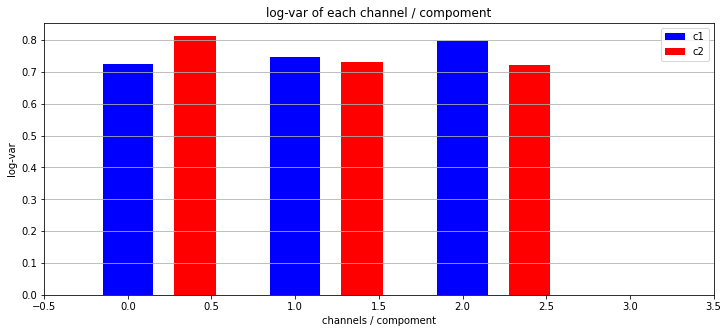

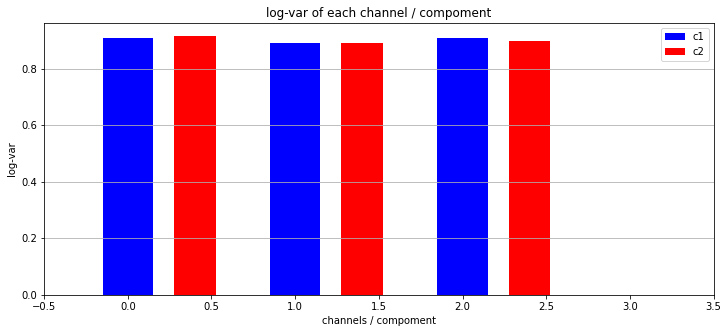

In [39]:
freband_train_csp_var[1,0:5,:]

mybci.plot_logvar(freband_train_csp_var[3,train_label==0,:],freband_train_csp_var[3,train_label==1,:])
mybci.plot_logvar(freband_train_raw_var[0,train_label==0,:]/30,freband_train_raw_var[0,train_label==1,:]/30)

In [40]:
train_label[0:5]

array([0., 1., 0., 1., 1.], dtype=float32)

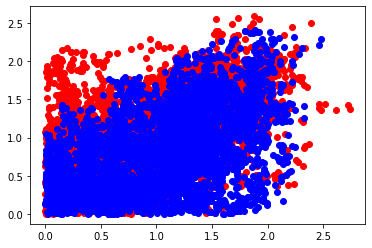

In [41]:
plt.scatter(freband_train_csp_var[1,train_label==0,0],freband_train_csp_var[1,train_label==0,-1],c='r')
plt.scatter(freband_train_csp_var[1,train_label==1,0],freband_train_csp_var[1,train_label==1,-1],c='b')


### **<font color = carmine>分类器输出分类结果</font>**

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skfeature.function.statistical_based import f_score
from sklearn.preprocessing import StandardScaler

In [43]:
'''
n_samples = freband_train_csp_feat.shape[1]


# perform evaluation on classification task
num_fea = 14            # number of selected features
clf = svm.LinearSVC()    # linear SVM

clf.fit(freband_train_csp_feat_conb,train_label)


scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)

score = f_score.f_score(freband_train_csp_feat_conb,train_label)


correct = 0
for train, test in ss:
    # obtain the f-score of each feature
    scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)
    #score = f_score.f_score(freband_train_csp_feat_conb, train_label)

    # rank features in descending order according to score
    idx = f_score.feature_ranking(scores)

    # obtain the dataset on the selected features
    selected_features = freband_train_csp_feat_conb[:, idx[0:num_fea]]

    # train a classification model with the selected features on the training dataset
    clf.fit(selected_features[train], train_label[train])

    # predict the class labels of test data
    y_predict = clf.predict(selected_features[test])

    # obtain the classification accuracy on the test data
    acc = accuracy_score(train_label[test], y_predict)
    correct = correct + acc

# output the average classification accuracy over all 10 folds
print('Accuracy:', float(correct)/10)
'''

"\nn_samples = freband_train_csp_feat.shape[1]\n\n\n# perform evaluation on classification task\nnum_fea = 14            # number of selected features\nclf = svm.LinearSVC()    # linear SVM\n\nclf.fit(freband_train_csp_feat_conb,train_label)\n\n\nscores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)\n\nscore = f_score.f_score(freband_train_csp_feat_conb,train_label)\n\n\ncorrect = 0\nfor train, test in ss:\n    # obtain the f-score of each feature\n    scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)\n    #score = f_score.f_score(freband_train_csp_feat_conb, train_label)\n\n    # rank features in descending order according to score\n    idx = f_score.feature_ranking(scores)\n\n    # obtain the dataset on the selected features\n    selected_features = freband_train_csp_feat_conb[:, idx[0:num_fea]]\n\n    # train a classification model with the selected features on the training dataset\n    clf.fit(selected_features[train], train_lab

In [44]:
#归一化
scaler = StandardScaler()
scaler.fit(freband_train_feat)
train_feat = scaler.transform(freband_train_feat)

clf = SVC(gamma='auto')  #

clf.fit(train_feat,train_label)

acc = 1 - (np.sum(abs(clf.predict(train_feat) - train_label)) / freband_train_csp_feat_conb.shape[0])

In [45]:

acc = 1 - (np.sum(abs(clf.predict(train_feat) - train_label)) / freband_train_csp_feat_conb.shape[0])
print('训练集上面的分类准确度为 : ',acc)

训练集上面的分类准确度为 :  0.8972619047619048


## **<font color = yellow>测试集提取CSP，并且预测结果</font>**

In [46]:
'''
freband_test_csp_var =  np.zeros((fre_band_num,freband_test_data.shape[1],freband_test_data.shape[2]))
print(freband_test_csp_var.shape)


for i in range(fre_band_num):
    freband_test_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:])))
'''

'\nfreband_test_csp_var =  np.zeros((fre_band_num,freband_test_data.shape[1],freband_test_data.shape[2]))\nprint(freband_test_csp_var.shape)\n\n\nfor i in range(fre_band_num):\n    freband_test_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:])))\n'

In [47]:
test_csp = scaler.transform(freband_test_feat)

test_acc = 1 - (np.sum(abs(clf.predict(test_csp) - test_label)) / freband_test_csp_feat_conb.shape[0])
print('测试集的预测准确率为:',test_acc)

测试集的预测准确率为: 0.6449404761904762


## **<font color = yellow>kappa值评价标准</font>**

In [48]:
from sklearn.metrics import cohen_kappa_score

kappa_score = cohen_kappa_score(clf.predict(test_csp),test_label)

print('kappa score value is :',kappa_score)

kappa score value is : 0.28988095238095235


In [49]:
test_label

array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)